# Steps

1. Importing the libraries
2. Importing the datasets
3. Data Cleaning, Data Exploration, Data Manipulation, Data Visualisation
4. EDA - Exploratory Data Analysis
5. Spliting the dataset
6. Choosing the model
7. Training the model
8. Testing the model
9. Model Evaluation
10. [Optional] Export the dataset into the .csv format

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Problem Statement

Given a dataset which captures the salary from July 1st, 2013 through June 30th, 2014. It includes only those employees who are employed on June 30, 2014. Predict the salary of Employees working in Baltimore.

# Importing the dataset

Link: https://raw.githubusercontent.com/ShapeAI/Data-Analysis-and-Machine-Learning/main/Linear%20Regression%20Baltimore-Salary%20Prediction/train.csv


In [2]:
df = pd.read_csv(r'C:\Users\ABC\Desktop\Machine Learning Algorithms\Supervised\Regression\Baltimore Salary prediction using SVM(SVR)\project file\Baltimore_City_Employee_Salaries.csv')

Head of the table

In [3]:
df.head()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,44557.99,2018-08-27,FY2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,185.00,2020-12-08,FY2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,29461.96,1979-10-24,FY2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,85450.35,2016-12-12,FY2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,102775.97,2018-04-17,FY2021,5


Tail of the table

In [4]:
df.tail()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
154182,NaN,9,BPD,BPD,Police Department,A99,65499.0,64127.83,1970-01-01,FY2011,154183
154183,NaN,0,BPD,BPD,Police Department,A99,63384.0,66187.45,1970-01-01,FY2011,154184
154184,NaN,1,BPD,BPD,Police Department,A99,61102.0,71989.51,1970-01-01,FY2011,154185
154185,NaN,2,BPD,BPD,Police Department,A99,59958.0,53235.59,1970-01-01,FY2011,154186
154186,NaN,3,BPD,BPD,Police Department,A99,68523.0,95152.89,1970-01-01,FY2011,154187


find Rows and columns 

In [5]:
df.shape

(154187, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154187 entries, 0 to 154186
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   lastName       153777 non-null  object 
 1   middleInitial  121195 non-null  object 
 2   firstName      154187 non-null  object 
 3   jobClass       154003 non-null  object 
 4   agencyName     154187 non-null  object 
 5   agencyID       154187 non-null  object 
 6   annualSalary   154187 non-null  float64
 7   grossPay       154187 non-null  float64
 8   hireDate       154185 non-null  object 
 9   fiscalYear     154187 non-null  object 
 10  ObjectId       154187 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 12.9+ MB


In [7]:
df.describe()

,annualSalary,grossPay,ObjectId
count,154187.000000,154187.000000,154187.000000
mean,52873.341579,55266.226727,77094.000000
std,25066.781786,33516.800966,44510.097315
min,0.000000,1.710000,1.000000
25%,34518.000000,33404.750000,38547.500000
50%,50238.000000,52070.440000,77094.000000
75%,68487.000000,74476.905000,115640.500000
max,276375.000000,373111.190000,154187.000000


Print all the columns names

In [8]:
df.columns

Index(['lastName', 'middleInitial', 'firstName', 'jobClass', 'agencyName',
       'agencyID', 'annualSalary', 'grossPay', 'hireDate', 'fiscalYear',
       'ObjectId'],
      dtype='object')

In [9]:
# Making a copy of the original DataFrame
newdf = df.copy()

Rename  the lastName with " lastName"

In [10]:
newdata = newdf.rename(columns={'lastname': ' lastName'})

In [11]:
print(newdata.columns)

Index(['lastName', 'middleInitial', 'firstName', 'jobClass', 'agencyName',
       'agencyID', 'annualSalary', 'grossPay', 'hireDate', 'fiscalYear',
       'ObjectId'],
      dtype='object')


In [12]:
# Removing the leading & trailing spaces and converting all the columns into the uppercase
newdf.columns= newdf.columns.str.strip().str.upper()

In [13]:
newdata.columns

Index(['lastName', 'middleInitial', 'firstName', 'jobClass', 'agencyName',
       'agencyID', 'annualSalary', 'grossPay', 'hireDate', 'fiscalYear',
       'ObjectId'],
      dtype='object')

In [14]:
# Removing the leading & trailing spaces and converting all the columns into the lowercase
newdf.columns= newdf.columns.str.strip().str.lower()

In [15]:
newdf.columns

Index(['lastname', 'middleinitial', 'firstname', 'jobclass', 'agencyname',
       'agencyid', 'annualsalary', 'grosspay', 'hiredate', 'fiscalyear',
       'objectid'],
      dtype='object')

In [16]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,grosspay,hiredate,fiscalyear,objectid
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,44557.99,2018-08-27,FY2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,185.00,2020-12-08,FY2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,29461.96,1979-10-24,FY2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,85450.35,2016-12-12,FY2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,102775.97,2018-04-17,FY2021,5


In [17]:
# Checking for null values
newdf.isnull().sum()

lastname           410
middleinitial    32992
firstname            0
jobclass           184
agencyname           0
agencyid             0
annualsalary         0
grosspay             0
hiredate             2
fiscalyear           0
objectid             0
dtype: int64

In [18]:
# Delete the column GrossPay
newdf.drop('grosspay', axis=1, inplace=True)

In [19]:
newdf.columns

Index(['lastname', 'middleinitial', 'firstname', 'jobclass', 'agencyname',
       'agencyid', 'annualsalary', 'hiredate', 'fiscalyear', 'objectid'],
      dtype='object')

In [20]:
newdf.agencyid

0         A50
1         D01
2         A03
3         A65
4         A99
         ... 
154182    A99
154183    A99
154184    A99
154185    A99
154186    A99
Name: agencyid, Length: 154187, dtype: object

In [21]:
# Values_counts for agencyid
newdf.agencyid.value_counts()

agencyid
A99    34706
A64    18374
A50    16353
A65     9640
A49     7007
       ...  
A28        3
P65        3
A53        2
U01        1
A9         1
Name: count, Length: 71, dtype: int64

In [22]:
newdf.agencyid.value_counts()

agencyid
A99    34706
A64    18374
A50    16353
A65     9640
A49     7007
       ...  
A28        3
P65        3
A53        2
U01        1
A9         1
Name: count, Length: 71, dtype: int64

In [23]:
newdf[newdf['agencyid']=='A99']['agencyid']

4         A99
8         A99
9         A99
17        A99
21        A99
         ... 
154182    A99
154183    A99
154184    A99
154185    A99
154186    A99
Name: agencyid, Length: 34706, dtype: object

print all uniq values in agenctID and map with there agenctName column

In [24]:
newdf.agencyid.value_counts().map(newdf.agencyname)

agencyid
A99                   State's Attorney's Office
A64                                         D01
A50                           Health Department
A65                                       MOCFS
A49                             Fire Department
                         ...                   
A28                           Health Department
P65                           Health Department
A53    Mayor's Office of Employment Development
U01                                         D01
A9                                          D01
Name: count, Length: 71, dtype: object

In [25]:
newdf[newdf['agencyid']=='A9']['agencyid']

139786    A9
Name: agencyid, dtype: object

In [26]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,FY2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,FY2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,FY2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,FY2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,FY2021,5


In [27]:
len(newdf[newdf.agencyid == 'A99']['agencyid'])

34706

In [28]:
print(newdf.fiscalyear)

0         FY2021
1         FY2021
2         FY2021
3         FY2021
4         FY2021
           ...  
154182    FY2011
154183    FY2011
154184    FY2011
154185    FY2011
154186    FY2011
Name: fiscalyear, Length: 154187, dtype: object


In [29]:
newdf.fiscalyear.value_counts()

fiscalyear
FY2020    16653
FY2011    14454
FY2012    14276
FY2021    14179
FY2013    14177
FY2014    13856
FY2015    13737
FY2018    13518
FY2016    13410
FY2019    13134
FY2017    12793
Name: count, dtype: int64

Cleaning the data

In [30]:
## clean the fiscalYear columns and remove 'FY' and make it int
newdf['fiscalyear'] = newdf['fiscalyear'].str.strip('FY').astype(int)

In [31]:
newdf.fiscalyear.value_counts()

fiscalyear
2020    16653
2011    14454
2012    14276
2021    14179
2013    14177
2014    13856
2015    13737
2018    13518
2016    13410
2019    13134
2017    12793
Name: count, dtype: int64

In [32]:
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,2021,5


## clean the middleInitial column and replace all 1 as a, 2 as b , 3 as c,, etc, according to ther position

In [33]:
newdf.middleinitial

0         D
1         R
2         G
3         O
4         O
         ..
154182    9
154183    0
154184    1
154185    2
154186    3
Name: middleinitial, Length: 154187, dtype: object

In [34]:
newdf.middleinitial.value_counts()

middleinitial
A    15838
L    12651
M    12295
D     9829
J     8915
     ...  
c        2
z        1
x        1
f        1
-        1
Name: count, Length: 61, dtype: int64

In [35]:
newdf['middleinitial'] = newdf['middleinitial'].replace({'1':'a','2':'b','3':'c','4':'e','5':'f','6':'g','7':'h','8':'i','9':'j','0':'k','.':'l','-':'m'})


In [36]:
print(newdf.middleinitial.value_counts())


middleinitial
A    15838
L    12651
M    12295
D     9829
J     8915
E     7833
R     7071
C     6552
S     5491
T     4681
W     4040
P     3686
B     3395
N     2888
K     2820
G     2481
F     2114
H     2065
V     1866
O     1154
Y      923
I      913
Q      202
Z      196
e      191
n      130
a      128
U      125
X      100
l       71
y       59
h       47
j       46
g       46
r       46
b       44
i       44
c       44
f       43
k       41
t       38
s       15
d        8
m        7
o        6
v        6
p        5
u        4
x        1
z        1
Name: count, dtype: int64


In [37]:
# hiredate - hireday, hiremonth, hireyear (int)
newdf.head()

,lastname,middleinitial,firstname,jobclass,agencyname,agencyid,annualsalary,hiredate,fiscalyear,objectid
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,2018-08-27,2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,2020-12-08,2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,1979-10-24,2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,2016-12-12,2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,2018-04-17,2021,5


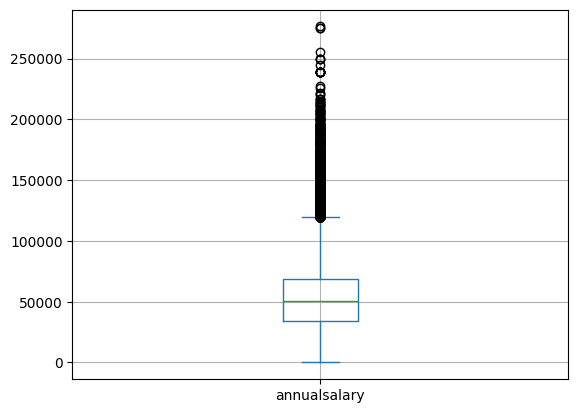

In [38]:
# Plot a BoxPlot for the annualsalary column
newdf.annualsalary.plot.box()
plt.grid()

<Axes: xlabel='annualsalary'>

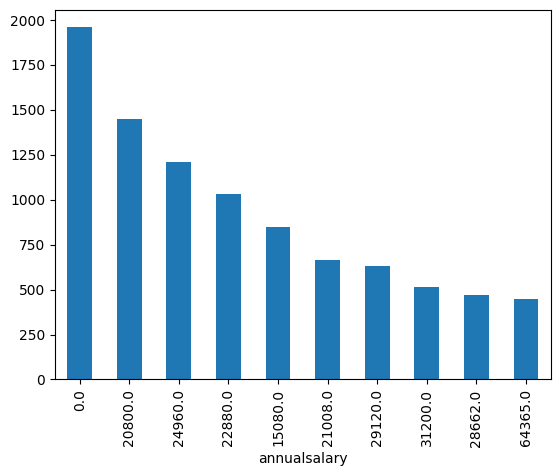

In [39]:
# Plot top 10 Jobs based on hiring
# print(newdf.columns)
newdf.groupby(['annualsalary'])['firstname'].count().sort_values(ascending=False).head(10).plot.bar()

Index(['lastname', 'middleinitial', 'firstname', 'jobclass', 'agencyname',
       'agencyid', 'annualsalary', 'hiredate', 'fiscalyear', 'objectid'],
      dtype='object')


<Axes: xlabel='agencyid'>

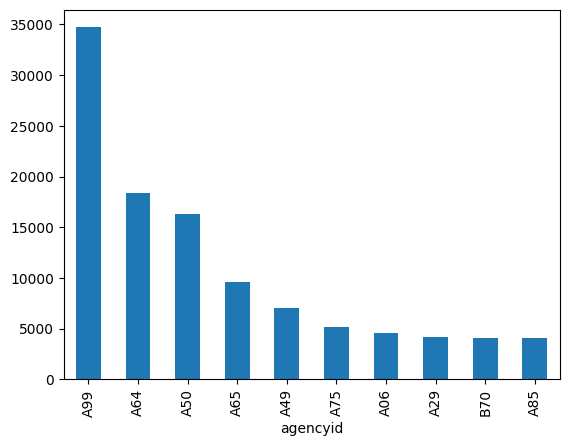

In [40]:
# Plot top 10 Agency's ID that has highest number of Employees
print(newdf.columns)
newdf.groupby(['agencyid'])['firstname'].count().sort_values(ascending=False).head(10).plot.bar()

c:\Users\ABC\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


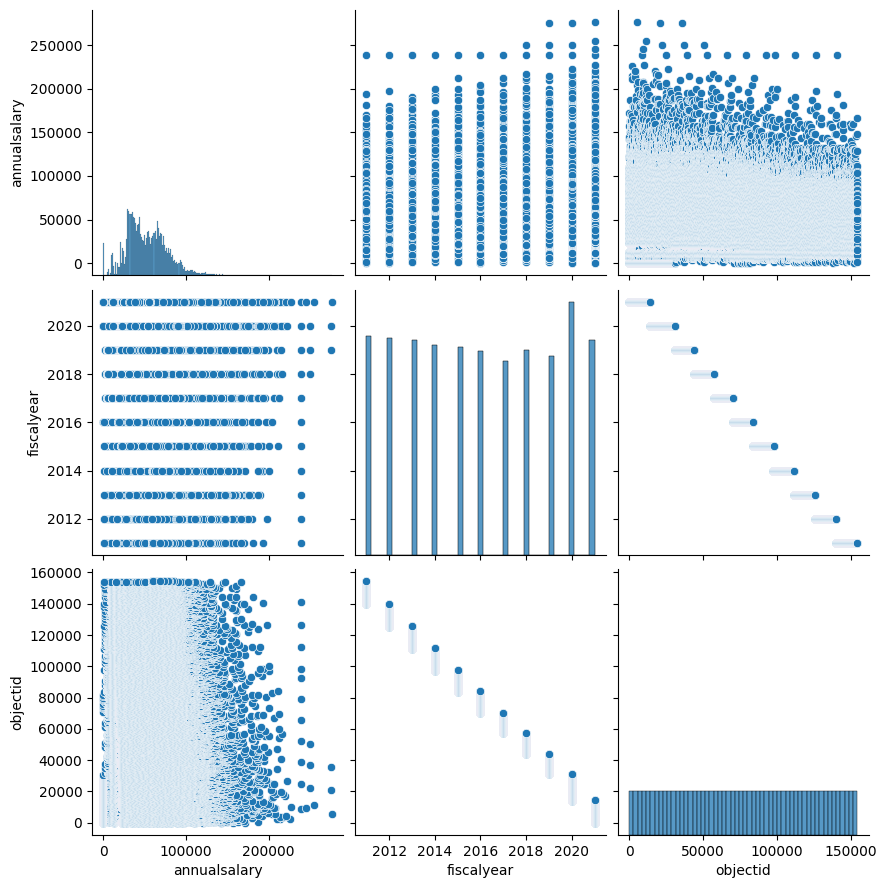

In [41]:
# Plot a pairplot
sns.pairplot(newdf,size=3)

# Machine Learning

*Get Features and Target values

from a variables "x" to store all the features and "Y" to store the target

In [42]:
X = np.array(newdf['fiscalyear'])
Y = np.array(newdf['annualsalary'])

reshape the X and Y variables

In [43]:
X = X.reshape(-1,1)
Y = Y

Splitting the data into 2 sets - Training and testing set

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.3)

* Choose the model

In [45]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()

* Train the model

In [46]:
lrmodel.fit(x_test,y_test)

LinearRegression()

Now predicting 

In [47]:
lrmodel.predict([[2021]])

array([59253.26376505])

performance Metric- MSE (cost function)

In [48]:
predict = lrmodel.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,predict)

In [50]:
mse

610919105.8421996

find Accuracy using matrix(r2)

In [51]:
from sklearn.metrics import r2_score
acc2 = r2_score(y_test,predict)

In [52]:
acc2

0.027409367701867082

* Conclusion


In summary, this program uses Support Vector Regression (SVR) to predict salaries of employees in Baltimore. It involves importing data, cleaning, exploring, and visualizing it. After splitting the data, the SVR model is chosen, trained, and tested for prediction. It's important to fine-tune and clarify some code sections for accurate results.